In [70]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
def int_cuadrada_trapecio(f,a,b):
    N = len(f)-1
    assert a<b
    Delta = (b-a)/N
    x_i = np.linspace(a,b,N+1)
    # f tiene que ser una función vectorizada
    f_xi = f
    # estimación media excluye el último punto
    area = (0.5*f_xi[0]+np.sum(f_xi[1:-1])+0.5*f_xi[-1])*Delta
    return area
def int_simpson(f,a,b):
    N = len(f)-1
    assert N%2==0
    assert a<b
    u2_3 = 2/3
    u4_3 = 4/3
    x_i = np.linspace(a,b,N+1)
    delta = (b-a)/N
    f_xi = f
    f_xi[0] /=2; f_xi[-1] /=2
    area = delta*np.sum([
        (u2_3*f_ if index[0]%2==0 else u4_3*f_)
        for index,f_ in np.ndenumerate(f_xi)
    ])
    return area

# Señal Triangular

In [100]:
def triangul(x,A,a,T=1,x0=0,center=1/2): # Senhal triangular de periodo 1 y definida solo entre 0 y 1
    # T va a ser el periodo
    assert T > 0
    # center no puede tomar valores inferiores a 0 o mayores a 1
    assert center >= 0 and center <= 1
    # x0 es la fase
    assert a>0 and a<=1
    assert A!=0
    # x'=x-x0 debe ser un valor entre 0 y T*a
    xprima = x-x0
    # toda funcion periodica f(t+T) = f(t).
    xprima = (xprima + T) % T
    return (A*xprima/(T*a) if xprima <= T*a else A*(1-(xprima-T*a)/(T*(1-a)))) - A*center
triangul=np.vectorize(triangul)

In [105]:
t = np.linspace(0,4,1001)

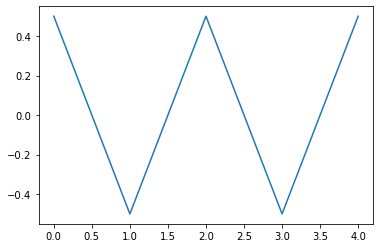

In [129]:
plt.plot(t,triangul(t,1,0.5,2,1))

In [75]:
def TFourier(y,T,kMax=10):
    # y tiene un numero determinado de datos
    N = len(y)
    t = np.linspace(0,T,N)
    a = []
    b = []
    for k in range(kMax+1):
        wk = 2*np.pi*k/T
        ak = int_cuadrada_trapecio(y*np.cos(wk*t),0,T)
        bk = int_cuadrada_trapecio(y*np.sin(wk*t),0,T)
        a.append(ak)
        b.append(bk)
    return a,b

In [140]:
T = 2
N = 100
t = np.linspace(0,T,N+1)
res_a,res_b = TFourier(triangul(t,1,0.5,2,1),T,kMax=100)

<BarContainer object of 101 artists>

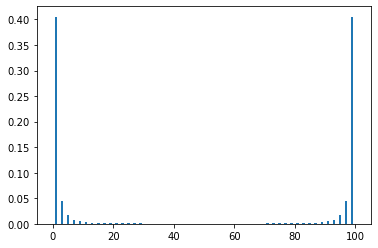

In [142]:
plt.bar(np.arange(100+1),res_a)

<BarContainer object of 101 artists>

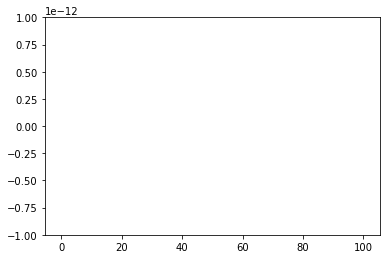

In [143]:
plt.bar(np.arange(100+1),res_b)

In [144]:
def invTFourier(t,a,b,T):
    assert len(a) == len(b)
    Sa = 0
    Sb = 0
    for it in range(len(a)):
        if it > 0:
            wk = 2*np.pi*it/T
            Sa += a[it]*np.cos(wk*t)
            Sb += b[it]*np.sin(wk*t)
    return a[0]/2 + Sa + Sb
invTFourierV = np.vectorize(invTFourier,excluded=[1,2,3])

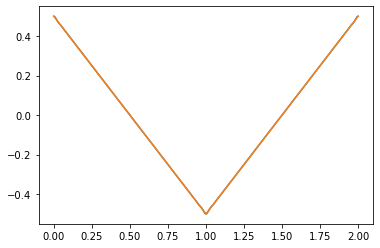

In [147]:
T = 2
N = 1000
t = np.linspace(0,T,N+1)
plt.plot(t,invTFourier(t,res_a[:51],res_b[:51],T))
plt.plot(t,triangul(t,1,0.5,2,1))